In [1]:
#%run /Users/shabnanasser/workplace/git/Capstone_Two/Cap2_Preprocessing.ipynb

# Modeling
In the Data Modeling section, we are going to train our standardised data with three different ML models: Logistic Regression, Decision Tree Classifier and Random Forest classifier. Also, we will check the accuracy, precision, recall and f-scores of each model and find the best performing model among them.


## 1) Logistic Regression

In [2]:
#importing required libraries

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score


In [3]:
# Create a logistic regression model with specified solver and maximum iterations
logreg_model = LogisticRegression(solver='liblinear',max_iter=1000)

# Hyperparameter tuning with cross-validation
# Cross-validate the logistic regression model using 5-fold cross-validation

cv_scores_logreg = cross_val_score(logreg_model, X_train, y_train, cv=5)
print(f"Cross-Validation Scores for Logistic Regression: {cv_scores_logreg}")
print(f"Mean CV Score: {cv_scores_logreg.mean()}\n")

# Train and evaluate the logistic regression model
# Fit the model on the transformed training data
logreg_model.fit(X_train_transformed, y_train)
# Make predictions on the transformed test data
y_pred_logreg = logreg_model.predict(X_test_transformed)

# Calculate evaluation metrics for logistic regression
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

# Print the evaluation metrics for logistic regression
print("Evaluation Metrics for Logistic Regression:")
print(f"Accuracy: {accuracy_logreg}")
print(f"Precision: {precision_logreg}")
print(f"Recall: {recall_logreg}")
print(f"F1-Score: {f1_logreg}\n")

Cross-Validation Scores for Logistic Regression: [0.85681293 0.86605081 0.84180139 0.86705202 0.82890173]
Mean CV Score: 0.8521237768492437

Evaluation Metrics for Logistic Regression:
Accuracy: 0.9279112754158965
Precision: 0.7014925373134329
Recall: 0.44761904761904764
F1-Score: 0.5465116279069767



InscClaimAmtReimbursed: 1.4400701322172427
ClmCount_Provider_DiagnosisGroupCode: 0.9874983680296971
Claim_Duration: 0.7302505085128804
ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_1: 0.6348146577396448
Admitted_Days: 0.6154319267399917
Opr_Phy_tot_claims: 0.5766265138124944
ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_3: 0.5489079854521023
ClmCount_Provider_BeneID_ClmDiagnosisCode_9: 0.5350288983346321
ChronicCond_Heartfailure: 0.5332172700785709
ClmCount_Provider_OperatingPhysician: 0.5271749896790023
ClmCount_Provider_BeneID_ClmDiagnosisCode_6_ClmProcedureCode_2: 0.5161888855421536
Claim_ProcCode1_OP_Annual_ReImb_Amt: 0.47974630269101826
ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_8: 0.47314305653779287
ClmCount_Provider_BeneID_ClmDiagnosisCode_2: 0.45439711540375155
ClmCount_Provider_BeneID_ClmProcedureCode_1: 0.4506233802123563
ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_9: 0.4386036852962432
ChronicCond_Alzheimer: 0.4199090

Text(0.5, 1.0, 'Top 20 Feature Importances')

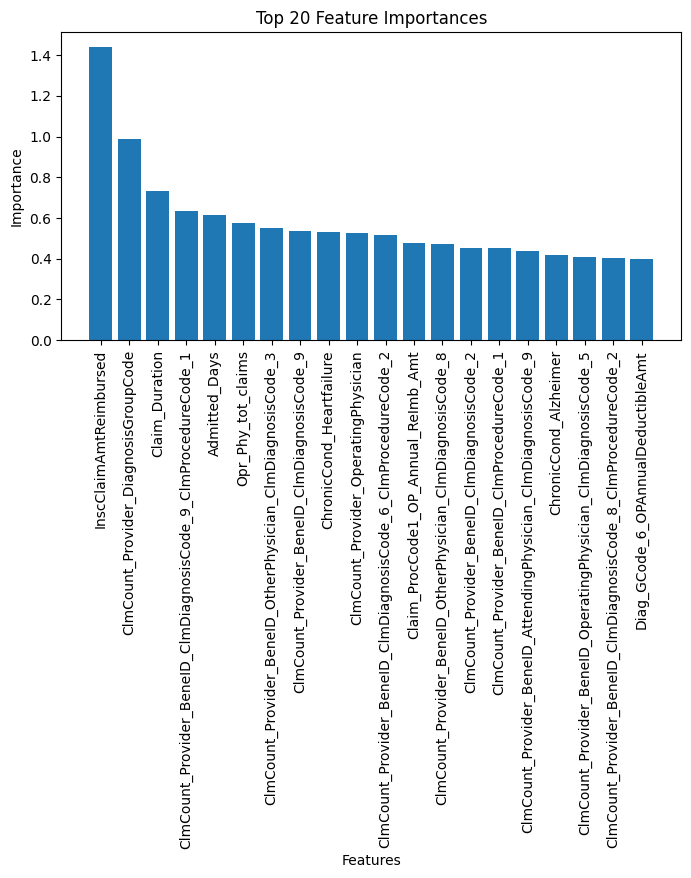

In [4]:

# Get feature importances (coefficients)
feature_importances = np.abs(logreg_model.coef_[0])

# Get the names of the features
feature_names = X.columns  # Assuming you have column names if X is a DataFrame

# Combine feature names and their importances
feature_importance_list = list(zip(feature_names, feature_importances))

# Sort the list by feature importance (descending order)
feature_importance_list.sort(key=lambda x: x[1], reverse=True)


top_n = 20  # Set the desired number of top features to plot

# Print or visualize the feature importances
for feature, importance in feature_importance_list[:top_n]:
    print(f"{feature}: {importance}")


plt.figure(figsize=(8,4))
plt.bar(range(top_n), [importance for feature, importance in feature_importance_list[:top_n]], align="center")
plt.xticks(range(top_n), [feature for feature, _ in feature_importance_list[:top_n]], rotation='vertical')
# Add x-axis and y-axis titles
plt.xlabel('Features')
plt.ylabel('Importance')

plt.title(f'Top {top_n} Feature Importances')



## 2) Decision Tree Classifier

In [5]:

# Create a Decision Tree model
dt_model = DecisionTreeClassifier()

# Hyperparameter tuning with cross-validation
# Cross-validate the Decision Tree model using 5-fold cross-validation
cv_scores_dt = cross_val_score(dt_model, X_train, y_train, cv=5)
print(f"Cross-Validation Scores for Decision Tree: {cv_scores_dt}")
print(f"Mean CV Score: {cv_scores_dt.mean()}\n")

# Train and evaluate the Decision Tree model
# Fit the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt_model.predict(X_test)

# Calculate evaluation metrics for the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Print the evaluation metrics for the Decision Tree model
print("Evaluation Metrics for Decision Tree:")
print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1-Score: {f1_dt}\n")



Cross-Validation Scores for Decision Tree: [0.90646651 0.90646651 0.90877598 0.90404624 0.89364162]
Mean CV Score: 0.9038793736400166

Evaluation Metrics for Decision Tree:
Accuracy: 0.8881700554528651
Precision: 0.42592592592592593
Recall: 0.4380952380952381
F1-Score: 0.431924882629108



InscClaimAmtReimbursed: 0.45041433254289126
OPT_PHY_OP_Annual_ReImb_Amt: 0.018524012046535757
Claim_DiagCode2_OP_Annual_Ded_Amt: 0.016036274417508347
ChronicCond_ObstrPulmonary: 0.013646703663929179
Claim_ProcCode1_IP_Annual_ReImb_Amt: 0.012807415864237946
IPAnnualDeductibleAmt: 0.011638804593300574
ATT_PHY_7_Admitted_Days: 0.011457008032065348
OPT_PHY_Claim_Duration: 0.010542206911651654
Claim_DiagCode5_Insc_ReImb_Amt: 0.010330707702506122
Claim_DiagCode4_Admit_Duration: 0.009927600533972304
OPT_PHY_4_IPAnnualDeductibleAmt: 0.009859997032670586
Claim_Admit_Diag_Code_CoPayment: 0.009259791545979734
Claim_ProcCode1_IP_Annual_Ded_Amt: 0.00879492127841842
ATT_PHY_1_InscClaimAmtReimbursed: 0.008788268348941633
ATT_PHY_CoPayment: 0.0078070761587979666


Text(0.5, 1.0, 'Top 15 Feature Importances')

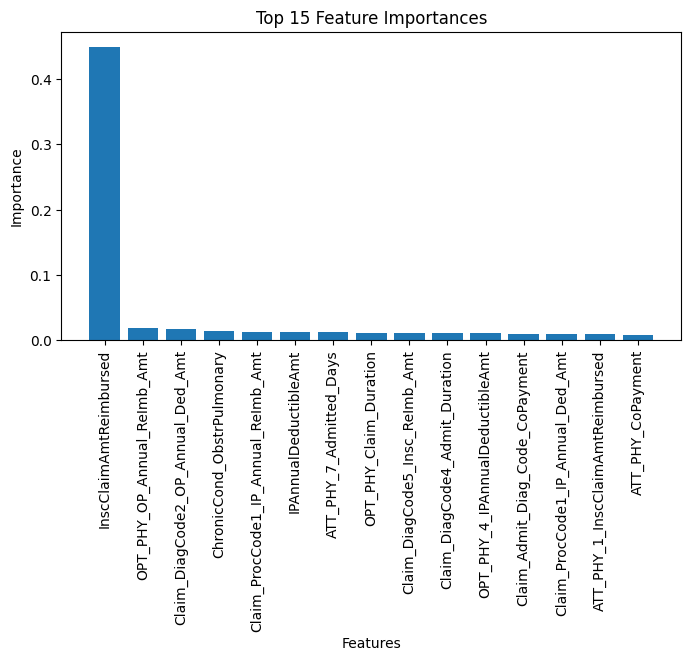

In [6]:
# Get feature importances
feature_importances = dt_model.feature_importances_

# Get the names of the features
feature_names = X.columns  # Assuming you have column names if X is a DataFrame

# Combine feature names and their importances
feature_importance_list = list(zip(feature_names, feature_importances))

# Sort the list by feature importance (descending order)
feature_importance_list.sort(key=lambda x: x[1], reverse=True)


top_n = 15  # Set the desired number of top features to plot

# Print or visualize the feature importances
for feature, importance in feature_importance_list[:top_n]:
    print(f"{feature}: {importance}")


plt.figure(figsize=(8,4))
plt.bar(range(top_n), [importance for feature, importance in feature_importance_list[:top_n]], align="center")
plt.xticks(range(top_n), [feature for feature, _ in feature_importance_list[:top_n]], rotation='vertical')
# Add x-axis and y-axis titles
plt.xlabel('Features')
plt.ylabel('Importance')

plt.title(f'Top {top_n} Feature Importances')



## 3) Random Forest Classifier:

In [7]:
# Create a Random Forest model
rf_model = RandomForestClassifier()

# Hyperparameter tuning with cross-validation
# Cross-validate the Random Forest model using 5-fold cross-validation
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5)
print(f"Cross-Validation Scores for Random Forest: {cv_scores_rf}")
print(f"Mean CV Score: {cv_scores_rf.mean()}\n")

# Train and evaluate the Random Forest model
# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics for the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

#print  evaluation metrics for the model
print("Evaluation Metrics for Random Forest:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1-Score: {f1_rf}\n")


Cross-Validation Scores for Random Forest: [0.93648961 0.92725173 0.94457275 0.92716763 0.92254335]
Mean CV Score: 0.9316050140837551

Evaluation Metrics for Random Forest:
Accuracy: 0.9232902033271719
Precision: 0.6964285714285714
Recall: 0.37142857142857144
F1-Score: 0.48447204968944096



InscClaimAmtReimbursed: 0.028062945916605776
Claim_Admit_Diag_Code_7_Admitted_Days: 0.025602349099812963
ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_9: 0.02017807662206391
Claim_DiagCode8_IP_Annual_ReImb_Amt: 0.01947702449419669
ClmCount_Provider_ClmDiagnosisCode_9: 0.019428994644392735
ClmCount_Provider_BeneID_ClmDiagnosisCode_9: 0.01680162836394349
Claim_DiagCode9_IP_Annual_Ded_Amt: 0.016197667760985676
Claim_Admit_Diag_Code_2_DeductibleAmtPaid: 0.01601027940834363
IPAnnualDeductibleAmt: 0.015507148641133221
Claim_DiagCode9_Insc_ReImb_Amt: 0.013648108117084768
Claim_DiagCode8_Insc_ReImb_Amt: 0.013439286292176444
Claim_Admit_Diag_Code_CoPayment: 0.012878455145923326
Claim_DiagCode8_Claim_Duration: 0.012680804910460086
Claim_DiagCode8_Admit_Duration: 0.012390048676359676
ClmCount_Provider_BeneID_OperatingPhysician_ClmDiagnosisCode_9: 0.012144557008864458


Text(0.5, 1.0, 'Top 15 Feature Importances')

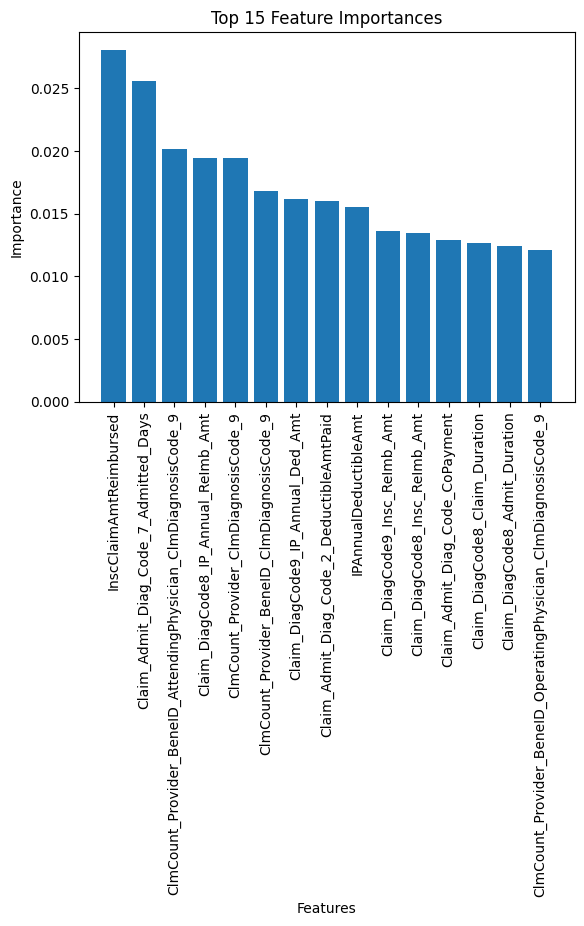

In [8]:

# Get feature importances
feature_importances = rf_model.feature_importances_

# Get the names of the features
feature_names = X.columns  # Assuming you have column names if X is a DataFrame

# Combine feature names and their importances
feature_importance_list = list(zip(feature_names, feature_importances))

# Sort the list by feature importance (descending order)
feature_importance_list.sort(key=lambda x: x[1], reverse=True)


top_n = 15  # Set the desired number of top features to plot

# Print or visualize the feature importances
for feature, importance in feature_importance_list[:top_n]:
    print(f"{feature}: {importance}")



plt.bar(range(top_n), [importance for feature, importance in feature_importance_list[:top_n]], align="center")
plt.xticks(range(top_n), [feature for feature, _ in feature_importance_list[:top_n]], rotation='vertical')
# Add x-axis and y-axis titles
plt.xlabel('Features')
plt.ylabel('Importance')

plt.title(f'Top {top_n} Feature Importances')



<p><div style="text-align: justify;"><span style="font-family: 'Arial'; font-size: 12pt;">
The accuracy and f score of Logistic Regression is greater than all other model. Hence we can conclude that the best performing model among these models is Logistic Regression with an accuracy of 0.927 and F1-Score: 0.546. Also, the features 
InscClaimAmtReimbursed, ClmCount_Provider_DiagnosisGroupCode, Claim_Duration, ClmCount_Provider_BeneID_ClmDiagnosisCode_9_ClmProcedureCode_1, Admitted_Days, Opr_Phy_tot_claims, ClmCount_Provider_BeneID_OtherPhysician_ClmDiagnosisCode_3, ClmCount_Provider_BeneID_ClmDiagnosisCode_9, ChronicCond_Heartfailure, ClmCount_Provider_OperatingPhysician are the top 10 features with highest feature importance value greater than 0.5. Hence, we can confirm that these features contribute our logistic regression model to perform best out of other two models.</span></p>